<a href="https://colab.research.google.com/github/FB-Decipherer/Experiment-14/blob/main/Save_Digits_Dataset_28x28_Dec_11_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# MNIST Dataset 28 x 28, 70,000

In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns; sns.set(font_scale=1.2)


# Get dataset from WS:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print('X_train.shape: ' + str(X_train.shape))
print('y_train.shape: ' + str(y_train.shape))
print(' ')

print('X_test.shape   ' + str(X_test.shape))
print('y_test.shape   ' + str(y_test.shape))
print(' ')


11490434/11490434 [==============================] - 0s 0us/step
X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
 
X_test.shape   (10000, 28, 28)
y_test.shape   (10000,)
 


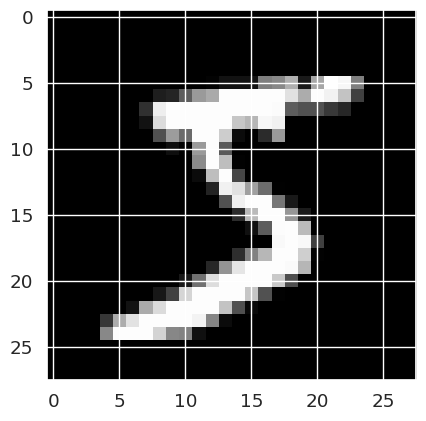

In [5]:
# Display first image from WS dataset:

plt.imshow(X_train[0], cmap='gray')
plt.show()

raw_ws_images = X_train
ws_image_arrays = np.array(raw_ws_images)

# Flatten the image data:

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

print('flattened X_train.shape: ' + str(X_train.shape))
print('X_train.shape: ' + str(y_train.shape))

print('flattened X_test.shape   ' + str(X_test.shape))
print('y_test.shape   ' + str(y_test.shape))
print(' ')


flattened X_train.shape: (60000, 784)
X_train.shape: (60000,)
flattened X_test.shape   (10000, 784)
y_test.shape   (10000,)
 


In [7]:
# Only try a subset of the data images:

trial_count = 10000

X_train = X_train[:trial_count, :]
y_train = y_train[:trial_count]
X_test = X_test[:trial_count, :]
y_test = y_test[:trial_count]


In [8]:
# Display the first local image:
#plt.imshow(my_image_list[0],cmap='binary')
#plt.title('First image read from local')
#plt.show()

In [9]:
# from sklearn.neural_network import MLPClassifier

# model = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
#                     solver='sgd', tol=1e-4, random_state=1,
#                     learning_rate_init=.1, verbose=True)


In [10]:
from sklearn import svm
from sklearn import metrics

model = svm.SVC()

# Train the neural network:

In [11]:

model.fit(X_train,y_train)

SVC()

# Examine the 1st 50 examples in the test sample:

In [12]:

predictions = model.predict(X_test)
predictions[:50]


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4], dtype=uint8)

# Examine the 1st 50 targets (correct answers) in the test sample:

In [13]:

y_test[:50]


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4], dtype=uint8)

# Compute the accuracy of the classifier:

In [14]:
from sklearn.metrics import accuracy_score

#accuracy_score(y_test, predictions)


Accuracy:  0.9594


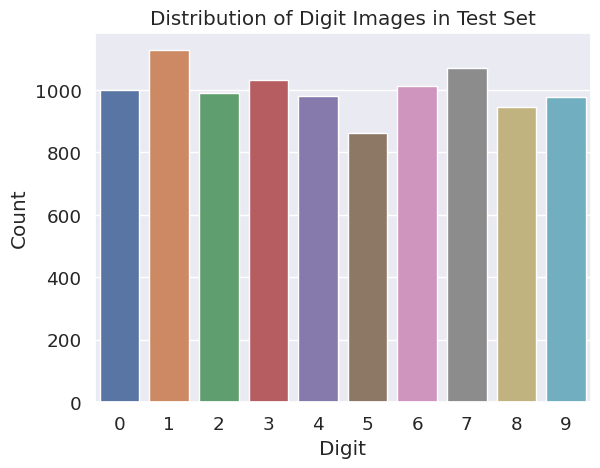

In [15]:
acc = metrics.accuracy_score(y_test, predictions)
print('\nAccuracy: ', acc)

digits = pd.DataFrame.from_dict(y_train)

import seaborn as sns
ax = sns.countplot(x=0, data=digits)

ax.set_title("Distribution of Digit Images in Test Set")
ax.set(xlabel='Digit')
ax.set(ylabel='Count')

plt.show()

[[ 969    0    2    0    0    3    3    1    2    0]
 [   0 1123    3    2    0    1    3    1    2    0]
 [   7    0  989    5    7    0    4   10   10    0]
 [   1    1   13  963    0   10    1   11    9    1]
 [   1    0    3    0  946    0    6    1    2   23]
 [   6    1    3   19    2  840   12    1    6    2]
 [   7    3    1    0    5    3  937    0    2    0]
 [   0   13   20    4    7    0    0  971    1   12]
 [   4    1    5   12    6    6    4    5  926    5]
 [   8    7    2   11   28    2    0   14    7  930]]


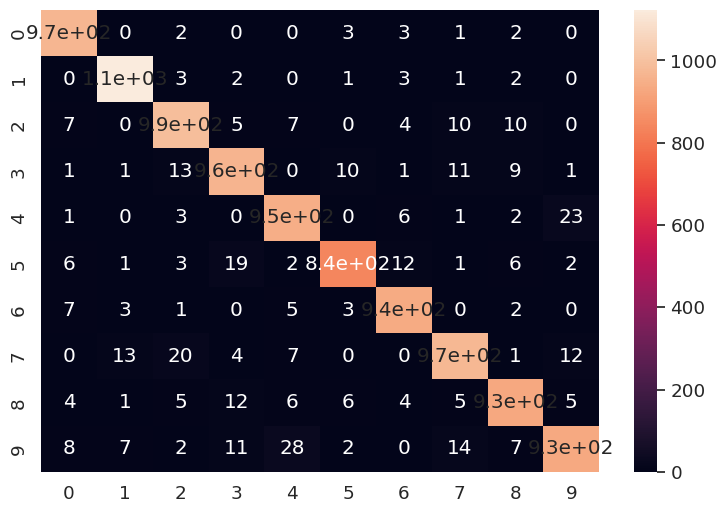

In [16]:
plt.show()

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

cm = metrics.confusion_matrix(y_test, predictions)

ax = plt.subplots(figsize=(9, 6))

sns.heatmap(cm, annot=True)

#ax.set_title("SVC Prediction Accuracy")
#ax.set_xlabel("Predicted Digit")
#ax.set_ylabel("True Digit")

plt.show()